# Introduction

The dataset I will be working with contains information on various cars. For each car I have information on the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile).

Note: The dataset I have has no header. The column names are extracted from the above given link.

In [1]:
import pandas as pd

pd.set_option('display.max_columns',26)
cars=pd.read_csv("imports-85.data",header=None)

cars.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:

# using column names from the dataset documentation mentioned above
cols = ['symbolizing','normalized-losses','make','fuel-type','aspiration','num-of-doors',
        'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
        'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
        'stroke', 'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
        'price']

In [3]:
cars.columns=cols

In [4]:
cars.head()

,symbolizing,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Rescaling numeric columns and correcting the missing values


From the result, I can tell that the normalized-losses column contains missing values represented using "?".I really think it would be a 'great loss' if I remove these values instead of replacing from the dataframe, expecially since there are 40 missing values out of a possible 204. That's almost 20% !!

So, replacing these values and looking for the presence of missing values in other numeric columns. Also, normalizing the values in the numeric columns so they all range from 0 to 1 would be easier to compare.


In [5]:
import numpy as np

cars = cars.replace('?',np.nan)
# checking the null values in dataset again
print(cars.isnull().sum())

symbolizing           0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [6]:
numeric_cols  = ['symbolizing','normalized-losses','wheel-base','length','width','height'
,'curb-weight','engine-size','bore','stroke', 'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
'price']

numeric_cars =cars[numeric_cols]

In [7]:
numeric_cars.head()

,symbolizing,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Handling Missing values

- Dropping row in price column.
- Replacing other columns missing values with mean

In [8]:
numeric_cars=numeric_cars.dropna(subset=['price'])
numeric_cars=numeric_cars.astype('float')


In [9]:
numeric_cars.isnull().sum()

symbolizing           0
normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
price_col=numeric_cars["price"]

# Replace missing values in other columns using column means.
for col in numeric_cars.columns:
    numeric_cars[col].fillna(value=numeric_cars[col].mean(),inplace=True)


In [11]:
numeric_cars.isnull().sum()

symbolizing          0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Rescaling numeric columns using min-max normalization

There are different methods to normalize values.I am choosing min-max scaling method in this project.
It's very useful to normalize values when there are extremely high and low values in a column.Otherwise, our Euclidean distance will have distorted values which makes comparison harder.
- normalized_df=(df-df.min())/(df.max()-df.min())





In [12]:
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.shape[0]

201

In [13]:
numeric_cars.head()

,symbolizing,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Applying K-Nearest Neigbhors Algorithm

I created knn_train_test function which applies K-Nearest Neighbors Algorithm which takes in "k" splits. First, we will try to evaluate the model for univariate cases for each of the features and then move to multivariate model.This allows us to compare the error over different models and finally decide on optimal paramaters that will help me achieve highest accurate model with least error.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(train_col, target_col, df,k):
    
    np.random.seed(1)
    knn = KNeighborsRegressor(n_neighbors=k)    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

    

## Training Univariate Model

Let's start with some univariate k-nearest neighbors models. It helps us structure our code workflow and understand the features better.

In [15]:
cols=numeric_cars.columns
print(cols)

Index(['symbolizing', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [16]:
target_col="price"
features=[c for c in numeric_cars.columns if c!="price" ]
print(features)

['symbolizing', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']


In [17]:
# Training univariate case for each feature with n_neighbors to default 5 (i.e; k=5)
rmse_values={}

for col in features:
    x= knn_train_test(col,target_col,numeric_cars,5)
    rmse_values[col]=x
    
# Convert dict to series
rmse_values_series=pd.Series(rmse_values)
print(rmse_values_series.sort_values())
    

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
symbolizing          7979.434920
stroke               8006.529545
height               8144.441043
dtype: float64


In [18]:
import matplotlib.pyplot as plt

# Sorting rmse_values dict by values
rmse_values=dict(sorted(rmse_values.items(), key=lambda item: item[1]))
plt.bar(list(rmse_values.keys()), rmse_values.values())
plt.xticks(rotation=90, size=15)
plt.ylabel("RMSE", size=15)
plt.xlabel("Car attributes", size=15)
plt.title("RMSE for each car attribute", size=20)

Text(0.5, 1.0, 'RMSE for each car attribute')

In univariate model at default setting, engine-size,horsepower,curb-weight,highway-mpg, and width are the 5 features that showed low RMSE when compared to other feature. 

For each of these we looked at the 5 nearest neighbors. Let's see if we can get any more accurate by using the 1-10 closest neighbors.



In [19]:
top_5_features=['engine-size','horsepower','curb-weight','highway-mpg', 'width']
rmse_top_features={}
for col in top_5_features:
    y={}
    for i in range (1,11):
        x= knn_train_test(col,target_col,numeric_cars,i)
        y[i]=x
    rmse_top_features[col]=y
    
rmse_top_features

{'engine-size': {1: 3258.4861059962027,
  2: 2961.4020942555885,
  3: 2840.562805643501,
  4: 3138.595302582206,
  5: 3238.4628296477176,
  6: 3443.5401792990074,
  7: 3563.086774256415,
  8: 3670.755242828608,
  9: 3831.8244149840766,
  10: 3964.2128905101868},
 'horsepower': {1: 4170.054848037801,
  2: 3803.2395476660017,
  3: 4020.8492630885394,
  4: 3907.843870390235,
  5: 4037.0377131537603,
  6: 4234.914425772894,
  7: 4353.811860277134,
  8: 4391.779417789255,
  9: 4515.135617419103,
  10: 4637.019239823688},
 'curb-weight': {1: 5264.290230758878,
  2: 5550.55186512348,
  3: 5022.318011757233,
  4: 4742.881546210715,
  5: 4401.118254793124,
  6: 4418.368809715738,
  7: 4330.608104418053,
  8: 4491.429833104293,
  9: 4632.044474454401,
  10: 4786.143941578121},
 'highway-mpg': {1: 6025.594966720739,
  2: 5168.1783720807825,
  3: 4617.305019788554,
  4: 4411.165565826527,
  5: 4630.026798588056,
  6: 4578.28501688346,
  7: 4796.061440186946,
  8: 5123.749584404172,
  9: 5278.35805

In [20]:
top_feature_univariate_df=pd.DataFrame(rmse_top_features)

top_feature_univariate_df

,engine-size,horsepower,curb-weight,highway-mpg,width
1,3258.486106,4170.054848,5264.290231,6025.594967,4559.257298
2,2961.402094,3803.239548,5550.551865,5168.178372,4362.596087
3,2840.562806,4020.849263,5022.318012,4617.305020,4606.413692
4,3138.595303,3907.843870,4742.881546,4411.165566,4509.391429
5,3238.462830,4037.037713,4401.118255,4630.026799,4704.482590
6,3443.540179,4234.914426,4418.368810,4578.285017,4594.594316
7,3563.086774,4353.811860,4330.608104,4796.061440,4571.485046
8,3670.755243,4391.779418,4491.429833,5123.749584,4588.059576
9,3831.824415,4515.135617,4632.044474,5278.358057,4652.914172
10,3964.212891,4637.019240,4786.143942,5254.100358,4762.620389


Text(0, 0.5, 'RMSE')

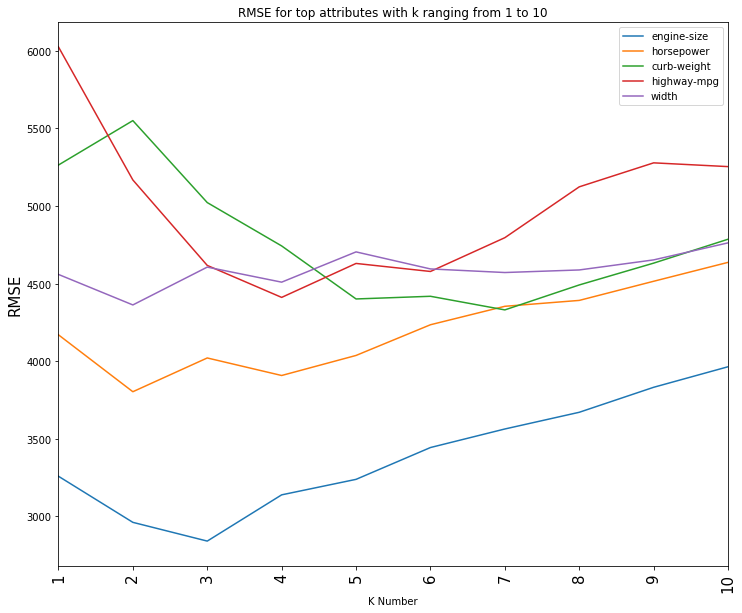

In [21]:
top_feature_univariate_df.plot(kind="line",figsize=(12,10))
plt.title("RMSE for top attributes with k ranging from 1 to 10")
plt.xlabel("K Number")
plt.xticks(rotation=90, size=15)
plt.ylabel("RMSE", size=15)

Engine size is a bit of an outlier here. For the other 4 it looks like a k number of 4-7 brings the most accurate predictions whereas with engine size the most accurate K number is 3.

Let's get further insight by training multivariate model using the top 5 features with low RMSE values in univariate model.Let's now increase the number of attributes we use to make our predictions. For example, do we get less a smaller margin of error if we look at the cars with the 2 or more features rather than just one of these features.

# Training Multivariate Model

In [22]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in rmse_top_features.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index


engine-size    3391.092864
horsepower     4207.168580
width          4591.181459
curb-weight    4763.975507
highway-mpg    4988.282518
dtype: float64


In [23]:
def knn_train_test(train_cols, target_col, df,k_values):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars,[5]
    )

k_rmse_results



{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805}}

Models with 2 best features outperformed. Models with features 5 and 4 were next best models respectively.

# Hyperparameter Optimization


Choosing optimal number of hyperparameter improves model performance. So, I will plot the resulting RMSE valuse for the top 3 models by varying the hyperparameter value from 1 to 25.

In [24]:
rmse_4models_hp={}
best_feat_models=[2,3,4,5]

for nr_best_feats in best_feat_models:
    rmse_4models_hp['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',numeric_cars,[i for i in range(1, 25)])
        
rmse_4models_hp

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

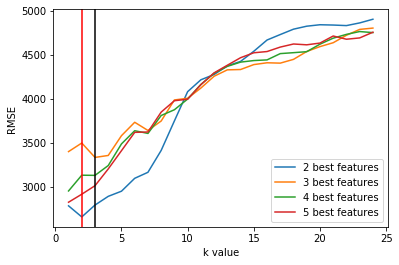

In [29]:
for k,v in rmse_4models_hp.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.axvline(x=3, ymin=0.0, ymax=1.0, color='black')
plt.axvline(x=2, ymin=0.0, ymax=1.0, color='red')

Looks like all these models performed well when the hyperparameter set from 1 to 4. The lowest RMSE's are found in the lower k neighbors (from 2-4). The singular lowest score came from using the attributes "curb-weight", "horsepower", "length", "highway-mpg", "engine-size" together along with a k number of 3. Throughout this project we have used the 50-50 train and test method. Let's finish by using a different technique k-folds. k-folds involves the following:

# Modified model using K-fold



In [26]:
from sklearn.model_selection import cross_val_score, KFold

# K fold function
def knn_train_test_kfold(train_cols, train_target, df, folds):
    rmses = []
    kf = KFold(folds, shuffle=True, random_state=1)
    model = KNeighborsRegressor(3)
    mses = cross_val_score(model, df[train_cols], df[train_target],
    scoring="neg_mean_squared_error", cv=kf)
    mses = list(mses)
    for v in mses:
        v = abs(v)
        rmse = v**(1/2)
        rmses.append(rmse)
    return rmses, np.mean(rmses), np.std(rmses)
    

k_folds = list(range(2,26))

k_folds_means = {}
k_folds_std = {}

# Loop through number of k folds
for n in k_folds:
    s = knn_train_test_kfold(top_5_features, target_col, numeric_cars, n)
    k_folds_means[n] = s[1]
    k_folds_std[n] = s[2]
    
print(k_folds_means)
print("\n------------------------------------------------------------------")
print(k_folds_std)

{2: 3029.194644842433, 3: 2893.1127608687457, 4: 2792.183124444007, 5: 2795.4208272594087, 6: 2687.310588689465, 7: 2763.9477341599986, 8: 2618.2388938565737, 9: 2599.8240753352675, 10: 2609.5892508235, 11: 2571.4670641160287, 12: 2585.0921693490404, 13: 2639.8347629627087, 14: 2585.67986299579, 15: 2531.7633742242224, 16: 2515.0107547719463, 17: 2489.2251812596137, 18: 2447.7053300900984, 19: 2494.992604928682, 20: 2439.7763705528223, 21: 2424.2170229855683, 22: 2438.807148807649, 23: 2432.0352721225127, 24: 2426.1325609927653, 25: 2419.9283457440597}

------------------------------------------------------------------
{2: 16.87411685519146, 3: 341.66533122195887, 4: 489.38705751649906, 5: 625.7319339124512, 6: 701.6441172188655, 7: 648.2323031144012, 8: 841.2206798691061, 9: 820.8368385645023, 10: 895.3648315129724, 11: 988.343379620648, 12: 921.1521552566351, 13: 882.2728191771224, 14: 962.5664182354114, 15: 1068.355857161368, 16: 1208.5813744930053, 17: 1153.3497508583373, 18: 1233.

Text(0.5, 1.0, 'K Folds')

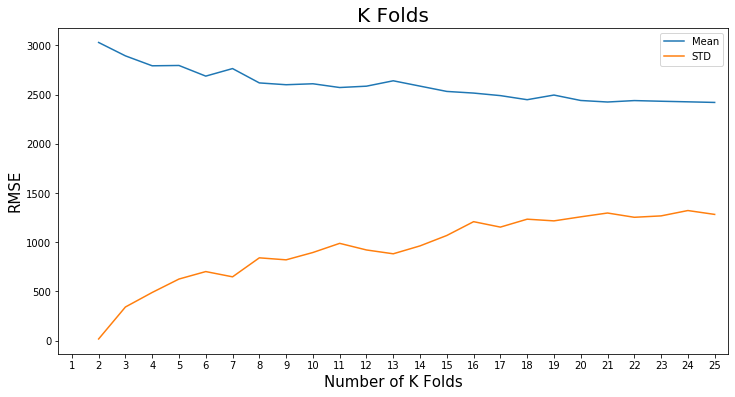

In [27]:
# Visualize K folds
plt.figure(figsize=(12,6))

plt.plot(list(k_folds_means.keys()), list(k_folds_means.values()), label='Mean')
plt.plot(list(k_folds_std.keys()), list(k_folds_std.values()), label='STD')
plt.legend()
plt.xticks(range(1, 26))
plt.xlim(0.5,25.5)
plt.ylabel("RMSE", size=15)
plt.xlabel("Number of K Folds", size=15)
plt.title("K Folds", size=20)

In this graph we have the mean RSME along with the standard deviation. A low mean RMSE is good but not if it comes with high variance. Likewise, a low variance is desriable but only if it comes with a low mean. There is usually a trade off between the two. In the graph above I would recommend 13 k folds as the variance is still low and the mean has begun to plateau at that point.

# Conclusion
Throghout this project the closest we got in predicting the price was to use the attributes "curb-weight", "horsepower", "length", "highway-mpg", "engine-size" together along with a k number of 3. 

- Two best features with 2 k-values yielded lowest root mean square error value at 2658.
- Five best features with 3 k-values yielded second lowest root mean square error value at 3012.
